# Importar

In [1]:
import pandas as pd
import plotly.express as px
from ipywidgets import widgets, interactive_output, HBox, VBox
from fpdf import FPDF
import matplotlib.pyplot as plt
import io
import os
from pathlib import Path


# Datos

In [2]:
# Cargar los datos avanzados para visualización
advanced_data = pd.read_csv('./Marketing_Bancario/Data/datos_para_visualizacion.csv')

# Visualización de datos

In [8]:
# Definición de la función de visualización interactiva para gráfica de dispersión
def plot_interactive(age_range, balance_range, deposit, contacts_range):
    filtered_data = advanced_data[
        (advanced_data['age'] >= age_range[0]) & (advanced_data['age'] <= age_range[1]) &
        (advanced_data['balance'] >= balance_range[0]) & (advanced_data['balance'] <= balance_range[1]) &
        (advanced_data['deposit'] == deposit) &
        ((advanced_data['campaign'] + advanced_data['previous']) >= contacts_range[0]) & 
        ((advanced_data['campaign'] + advanced_data['previous']) <= contacts_range[1])
    ]
    
    fig = px.scatter(filtered_data, x='age', y='balance', color='deposit',
                     size='duration', hover_data=['client', 'Cluster'],
                     title="Visualización Interactiva de Clientes")
    fig.update_layout(transition_duration=500)
    fig.show()


## Creación de widgets interactivos y visualización

In [45]:
# Crear widgets interactivos
age_slider = widgets.IntRangeSlider(value=[20, 60], min=0, max=100, step=1, description='Edad:')
balance_slider = widgets.IntRangeSlider(value=[-2000, 20000], min=-20000, max=20000, step=100, description='Balance:')
deposit_dropdown = widgets.Dropdown(options=['yes', 'no', 'both'], value='both', description='Depósito Realizado:')
contacts_slider = widgets.IntRangeSlider(value=[0, 10], min=0, max=20, step=1, description='Contactos con el Cliente:')

# Mostrar la visualización interactiva
ui = VBox([HBox([age_slider, balance_slider]), HBox([deposit_dropdown, contacts_slider])])
out = interactive_output(plot_interactive, {'age_range': age_slider, 'balance_range': balance_slider,
                                            'deposit': deposit_dropdown, 'contacts_range': contacts_slider})

display(ui, out)


Output()

## Definición de función de visualización adicional

In [ ]:
# Definición de la función de visualización interactiva
def plot_interactive_box(age_range, balance_range, deposit, contacts_range):
    filtered_data = advanced_data[
        (advanced_data['age'] >= age_range[0]) & (advanced_data['age'] <= age_range[1]) &
        (advanced_data['balance'] >= balance_range[0]) & (advanced_data['balance'] <= balance_range[1]) &
        (advanced_data['deposit'] == deposit) &
        ((advanced_data['campaign'] + advanced_data['previous']) >= contacts_range[0]) & 
        ((advanced_data['campaign'] + advanced_data['previous']) <= contacts_range[1])
    ]
    
    # Creación de la gráfica de diagrama de caja
    fig = px.box(filtered_data, x='deposit', y='balance',
                 color='deposit', title="Distribución del Balance por Estado de Depósito",
                 labels={'deposit': 'Depósito', 'balance': 'Balance'},
                 hover_data=['age', 'client', 'Cluster'])
    
    fig.update_layout(transition_duration=500)
    fig.show()

# Uso de la función sin los widgets por las restricciones del entorno
plot_interactive_box(age_range=[20, 60], balance_range=[-2000, 20000], deposit='yes', contacts_range=[0, 10])


In [11]:
# Función para la visualización interactiva ajustada
def plot_interactive_scatter(age_range, balance_range, deposit, contacts_range):
    # Filtrado de datos para manejar "both" en depósito
    if deposit == 'both':
        filtered_data = advanced_data
    else:
        filtered_data = advanced_data[advanced_data['deposit'] == deposit]
    
    filtered_data = filtered_data[
        (filtered_data['age'] >= age_range[0]) & (filtered_data['age'] <= age_range[1]) &
        (filtered_data['balance'] >= balance_range[0]) & (filtered_data['balance'] <= balance_range[1]) &
        ((filtered_data['campaign'] + filtered_data['previous']) >= contacts_range[0]) & 
        ((filtered_data['campaign'] + filtered_data['previous']) <= contacts_range[1])
    ]
    
    # Gráfica de dispersión
    fig = px.scatter(filtered_data, x='age', y='balance', color='deposit',
                     size='duration', hover_data=['client', 'Cluster', 'campaign', 'previous'],
                     title="Relación entre Edad y Balance, coloreada por Depósito",
                     labels={'deposit': 'Depósito', 'age': 'Edad', 'balance': 'Balance'})
    
    fig.update_layout(transition_duration=500)
    fig.show()

# Widgets para interactuar con la visualización
age_slider = widgets.IntRangeSlider(value=[20, 60], min=0, max=100, step=1, description='Edad:')
balance_slider = widgets.IntRangeSlider(value=[-2000, 20000], min=-20000, max=20000, step=100, description='Balance:')
deposit_dropdown = widgets.Dropdown(options=['yes', 'no', 'both'], value='both', description='Depósito Realizado:')
contacts_slider = widgets.IntRangeSlider(value=[0, 10], min=0, max=20, step=1, description='Contactos con el Cliente:')

# Contenedor para la visualización interactiva
ui = VBox([HBox([age_slider, balance_slider]), HBox([deposit_dropdown, contacts_slider])])
out = interactive_output(plot_interactive_scatter, {'age_range': age_slider, 'balance_range': balance_slider,
                                                    'deposit': deposit_dropdown, 'contacts_range': contacts_slider})

# Display UI
display(ui, out)


Output()

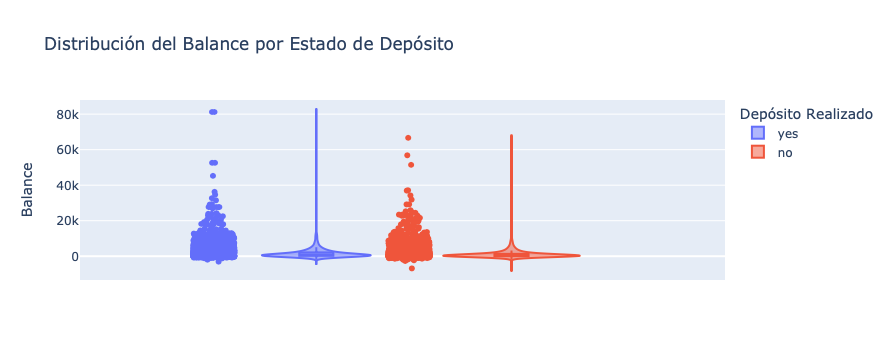

In [12]:
fig = px.violin(advanced_data, y="balance", color="deposit",
                box=True,  # Muestra la caja de resumen dentro del violín
                points="all",  # Muestra todos los puntos de datos
                hover_data=['age', 'client'],  # Datos adicionales al pasar el mouse
                title="Distribución del Balance por Estado de Depósito",
                labels={"deposit": "Depósito Realizado", "balance": "Balance"})
fig.show()

## Informe Directivo

In [42]:
# Usar pathlib para definir las rutas de manera flexible
base_path = Path.home() / 'Desktop/Marketing_Bancario/output'

# Rutas específicas a los archivos
ruta_recomendaciones = base_path / 'total_marketing_strategies_recommendations.txt'
ruta_datos_csv = base_path / 'total_campaign_effectiveness_insights.csv'


In [43]:
# Cargar el contenido del archivo de recomendaciones
try:
    contenido_recomendaciones = ruta_recomendaciones.read_text(encoding='utf-8')
    print(contenido_recomendaciones)
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo: {ruta_recomendaciones}")


Analizar características comunes de los clientes que han suscrito y no han suscrito para identificar oportunidades de mejora.
Personalizar las campañas de marketing según las preferencias y comportamientos de los clientes identificados en el análisis.
Implementar estrategias de seguimiento para clientes potenciales que no hayan suscrito inicialmente, como recordatorios o ofertas especiales.



In [44]:
# Cargar los datos desde el archivo CSV y mostrarlos
try:
    datos_csv = pd.read_csv(ruta_datos_csv)
    print(datos_csv)
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo: {ruta_datos_csv}")


                     Insight        Valor
0         Total de registros  11162.00000
1     Total de Suscripciones   5289.00000
2    Total sin Suscripciones   5873.00000
3  Tasa de Suscripción Total      0.47384


# Preparación de datos y generación de gráficas

In [46]:
# Función para generar una gráfica de dispersión y guardarla
def guardar_grafica_dispersión():
    fig = px.scatter(advanced_data, x='age', y='balance', color='deposit', size='duration', 
                     title="Relación entre Edad y Balance, coloreada por Depósito")
    fig.write_image(base_path / "grafica_dispersión.png")

# Función para generar una gráfica de violín y guardarla
def guardar_grafica_violin():
    fig = px.violin(advanced_data, y="balance", color="deposit", box=True, points="all", 
                    title="Distribución del Balance por Estado de Depósito")
    fig.write_image(base_path / "grafica_violin.png")

guardar_grafica_dispersión()
guardar_grafica_violin()


# Creación del informe PDF

In [47]:
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Informe de Marketing Bancario', 0, 1, 'C')
    
    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(10)
    
    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()
    
    def add_image(self, image_path):
        self.image(str(image_path), 10, None, 190)

pdf = PDF()
pdf.add_page()

pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Informe Directivo de Marketing Bancario', 0, 1, 'C')
pdf.ln(20)

# Añadir el contenido de texto
pdf.chapter_title('Resumen de Recomendaciones')
pdf.chapter_body(contenido_recomendaciones)

# Añadir gráficas
pdf.chapter_title('Gráfica de Dispersión: Edad y Balance')
pdf.add_image(base_path / "grafica_dispersión.png")

pdf.chapter_title('Gráfica de Violín: Distribución del Balance')
pdf.add_image(base_path / "grafica_violin.png")

# Guardar el informe PDF
nombre_informe = base_path / 'Informe_Directivo_Marketing_Bancario.pdf'
pdf.output(str(nombre_informe))

print(f"Informe generado con éxito: {nombre_informe}")


Informe generado con éxito: /Users/pablobasapacheco/Desktop/Marketing_Bancario/output/Informe_Directivo_Marketing_Bancario.pdf


/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_25599/36092031.py:3: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_25599/36092031.py:4: DeprecationWarning:

The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.

/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_25599/36092031.py:22: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_25599/36092031.py:23: DeprecationWarning:

The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.

/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_25599/36092031.py:7: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated